<a href="https://colab.research.google.com/github/SANTOSHMAHER/Text-Analysis-and-Word-Predaction/blob/master/Text_calcification_and_category_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, pandas as pd, numpy as np
import os




In [4]:
df=pd.read_excel("sample_data/2018_ted.xlsx")
df.head(10)

,Title,Description,Ref,TypeOfContract,Cpv (main),Cpv (additional)
0,"Financial audits, other assurance engagements ...","The Clean Sky 2 Joint Undertaking, the Innovat...",IMI.2017.OP.215,SERVICES,79200000.0,79210000
1,FIN17,The Translation Centre for the Bodies of the E...,FIN17,SERVICES,79530000.0,79530000
2,Mobile communications services and equipment,The purpose of this procurement is to acquire ...,EMSA/OP/22/2017,SERVICES,64200000.0,"64210000,64212100,64212000,64211200,64214000,7..."
3,Financial market data for the calculation of R...,Provision of financial market input data for v...,EIOPA/OP/009/2017,SERVICES,72300000.0,72319000
4,Consultancy services to improve efficiency and...,The main purpose of this procurement procedure...,OC/EFSA/CORSER/2017/03,SERVICES,79411000.0,NaN
5,Provision of services and works in support of ...,The European Central Bank intends to conclude ...,NaN,SERVICES,79212200.0,NaN
6,Provision of Consultancy Support Services for ...,ECB carries out a number of activities which f...,PRO-002952,SERVICES,71315210.0,79993000
7,"Supply and delivery of Food supplies (LOT 1), ...","Supply and delivery of Food supplies (LOT 1), ...",NaN,SUPPLIES,15800000.0,"41110000,39222100,15800000"
8,Supply of sustainably produced office material...,The purpose of this contract is the supply of ...,OIB.02/PO/2017/069/793,SUPPLIES,30192000.0,"30197630,30197643,30192000"
9,Framework Service Contract covering the mainte...,The framework contract to be concluded is main...,ENER/E1/2016-49-1,SERVICES,48000000.0,NaN


In [5]:
df = df[["Title","Cpv (main)"]]
df = df.rename(columns={"Cpv (main)":"CpvMain"})
df.head(3)

,Title,CpvMain
0,"Financial audits, other assurance engagements ...",79200000.0
1,FIN17,79530000.0
2,Mobile communications services and equipment,64200000.0


In [6]:
set(df["CpvMain"])
from collections import Counter
Counter(df["CpvMain"])

Counter({79200000.0: 43,
         79530000.0: 62,
         64200000.0: 102,
         72300000.0: 67,
         79411000.0: 107,
         79212200.0: 44,
         71315210.0: 14,
         15800000.0: 25,
         30192000.0: 36,
         48000000.0: 962,
         79000000.0: 289,
         79710000.0: 316,
         90700000.0: 195,
         44000000.0: 82,
         45000000.0: 1713,
         50000000.0: 413,
         33693200.0: 3,
         33196000.0: 12,
         85000000.0: 2325,
         45232470.0: 3,
         33180000.0: 7,
         79416000.0: 107,
         72224000.0: 127,
         55520000.0: 146,
         79330000.0: 33,
         34711300.0: 4,
         80511000.0: 81,
         55523000.0: 22,
         60000000.0: 2529,
         31600000.0: 35,
         85312000.0: 3676,
         80500000.0: 156,
         85100000.0: 4782,
         72250000.0: 30,
         79400000.0: 217,
         85140000.0: 61,
         34144213.0: 52,
         38433200.0: 19,
         31643000.0: 16,
       

In [7]:
df.shape

(58112, 2)

In [8]:
df = df.dropna()
df.shape

(58099, 2)

In [9]:
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#pre-processing
import re 
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)    
    return string.strip().lower()

In [0]:
X = df["Title"].astype(str).apply(clean_str)
y = np.array(df["CpvMain"])

In [0]:
def remove_stopwords(text):
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', text)
    return text

In [0]:
X = df["Title"].astype(str).apply(remove_stopwords)


In [0]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

In [0]:
#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])


In [17]:
#fit model with training data
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                         class_weight='balanced',
     

In [0]:
#evaluation on test data
pred = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(pred, y_test)

array([[9, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

NameError: ignored

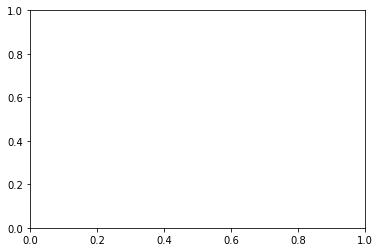

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(pred, y_test),annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
#ax.set_xlabel('Predicted labels');
ax.set_xlabel('Predicted label\naccuracy={:0.2f}'.format(accuracy_score(y_test,pred)))
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plt.savefig("prints_n_plots/Confusion2015.png")
ax.xaxis.set_ticklabels(['Title', 'CPv']); ax.yaxis.set_ticklabels(['CPv', 'Title']);

In [20]:
accuracy_score(y_test, pred)

0.6558232931726907

In [21]:
#save the model
from sklearn.externals import joblib
joblib.dump(model, 'ted_2018_calcification.pkl', compress=1)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['ted_2018_calcification.pkl']

In [24]:
Title = input()

Taxi passenger transport without passenger assistance


In [25]:
model.predict([Title])[0]

60000000.0